In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.preprocessing import MinMaxScaler
from ReliefF import ReliefF
from sklearn.metrics import roc_curve, roc_auc_score

<AxesSubplot:xlabel='age', ylabel='chol'>

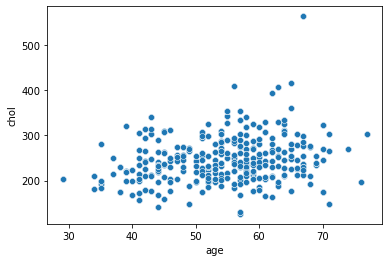

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\heart.csv')

#Filtering data by POSITIVE and NEGATIVE heart disease patient
#pos_data = data[data['target']==1]
#(pos_data.describe())

#pos_data = data[data['target']==0]
#pos_data.describe()

# calculating the correlation matrix to understand the relationship of features and targets
#corr = data.corr()
#plt.subplots(figsize=(15,10))
#sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True, cmap=sns.diverging_palette
 #          (220, 20, as_cmap=True))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette
 #          (220, 20, as_cmap=True))
    
sns.scatterplot(x=data['age'], y=data['chol'])


In [14]:
# Split the data into training and testing
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#relief = ReliefF(n_neighbors=20, n_features_to_keep=2)
#x = relief.fit_transform(x)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

#relief = ReliefF(n_neighbors=20, n_features_to_keep=2)
#x_train = relief.fit_transform(x, y)

#preprocessing our data with the standardscaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [17]:
#====================MY DEEP LEARNING MODEL=====================================#

# Creating a model with 4 dense layers (dense layers contain our neurons)
# when a layer is densely connected it means the layers are fully connected to each other
# The model uses BatchNormilzation() in order to scale our data in the range: [0, 1]
# i'm using the relu(rectified linear unit) optimizer and the sigmoid optimizer for the output layer
# the model is a sequential model
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', input_shape=[x.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

#  I Compiled the model using adam optimizer
# I Measured the loss with binary_crossentropy another loss funtion i can use is categorical_crossentropy
# Set metrics to binary_accuracy, which lets us know how accurate the model is
# The accuracy lies on a scale of [0.0, 1.0],
# In order to convert this accuracy to percentage, move the decimal point to the right twice (acc*100)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS,
)

# Finally fit the model, training it with X_train and y_train, and validating it with X_test and y_test
# I Used 25 data points per epoch (the amount of epochs is the amount of times we feed the model data)
# In this case i'm using 3 epochs
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=20,
)


Epoch 1/20
29/29 [==============================] - 30s 286ms/step - loss: 0.4698 - accuracy: 1.0000 - precision: 0.8228 - recall: 0.6445 - auc: 0.8830 - val_loss: 0.6181 - val_accuracy: 1.0000 - val_precision: 0.8291 - val_recall: 0.6736 - val_auc: 0.9097
Epoch 2/20
29/29 [==============================] - 2s 52ms/step - loss: 0.2484 - accuracy: 1.0000 - precision: 0.9084 - recall: 0.9084 - auc: 0.9660 - val_loss: 0.6525 - val_accuracy: 1.0000 - val_precision: 0.4948 - val_recall: 1.0000 - val_auc: 0.8903
Epoch 3/20
29/29 [==============================] - 1s 47ms/step - loss: 0.1652 - accuracy: 1.0000 - precision: 0.9342 - recall: 0.9293 - auc: 0.9840 - val_loss: 0.6342 - val_accuracy: 1.0000 - val_precision: 0.5053 - val_recall: 1.0000 - val_auc: 0.9386
Epoch 4/20
29/29 [==============================] - 1s 44ms/step - loss: 0.0997 - accuracy: 1.0000 - precision: 0.9662 - recall: 0.9738 - auc: 0.9934 - val_loss: 0.5192 - val_accuracy: 1.0000 - val_precision: 0.7157 - val_recall: 0.9

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       164
           1       0.82      0.85      0.84       144

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308

accuracy score:  <function accuracy_score at 0x0000001CEAC3E790>


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.8441558441558441

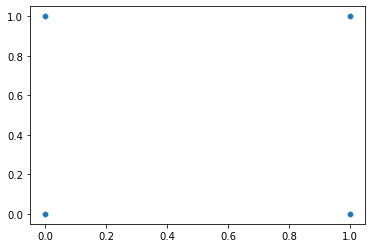

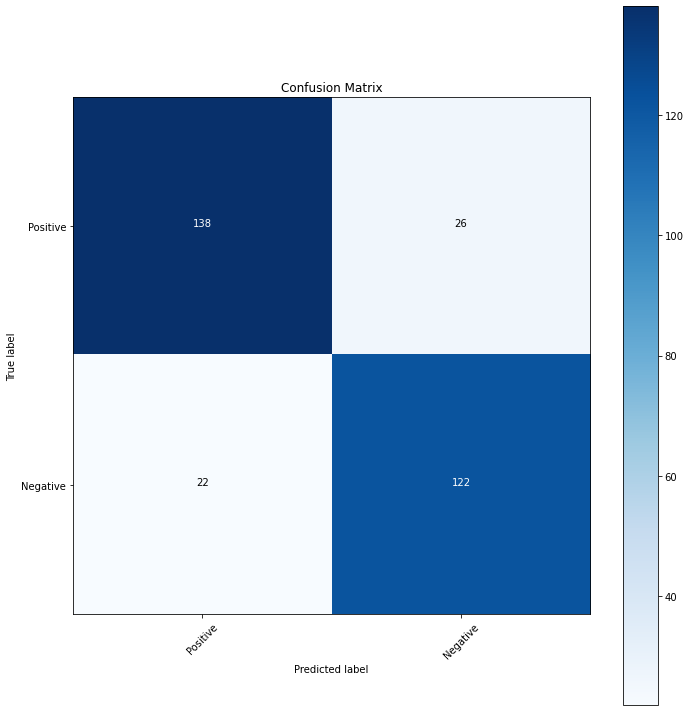

In [4]:
#==========================MY KNN MODEL===============================
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print("accuracy score: ", accuracy_score)

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
target_names = ["Positive", "Negative"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred)

roc_auc_score for KNN:  0.8443428184281843


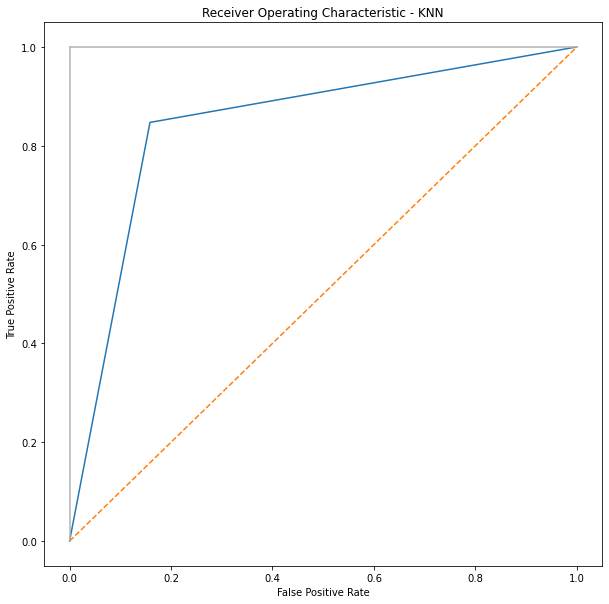

In [20]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_pred))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       161
         1.0       0.97      0.95      0.96       147

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



0.9642857142857143

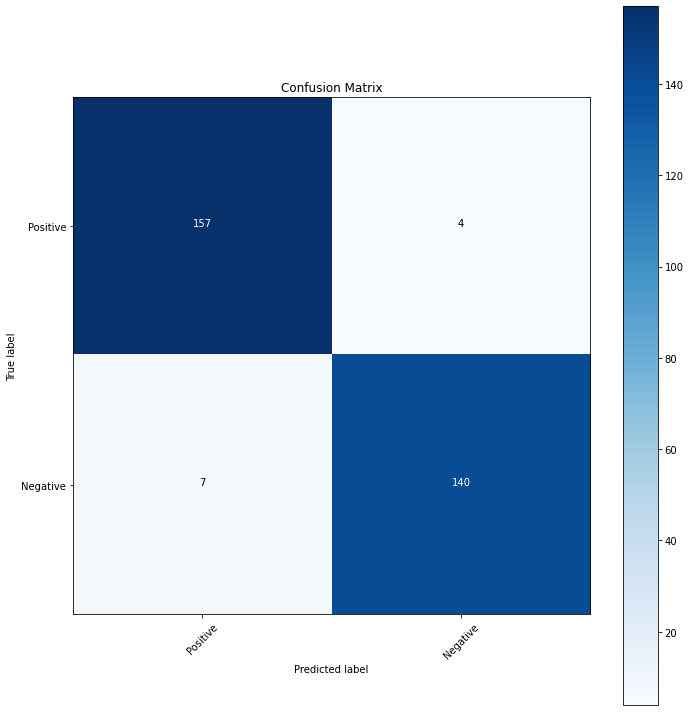

In [18]:
#==========================THE PERFORMANCE OF MY NEURAL NETWORK MODEL===============================
#y_pred = model.predict(x_test)
#acc_score=(model.evaluate(x_test, y_test)[1])
#acc_score
#print("Accuracy of Artificial Neural Network model:",acc_score*100,'\n')

y_pred1 = model.predict(x_test).reshape(-1)
#print (y_pred1[:5])
y_pred1 = np.round(y_pred1)
print ( classification_report(y_pred1, y_test))
cm1 = confusion_matrix(y_pred1, y_test)

def plot_confusion_matrix1(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
target_names = ["Positive", "Negative"]
plot_confusion_matrix(cm1, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred1)

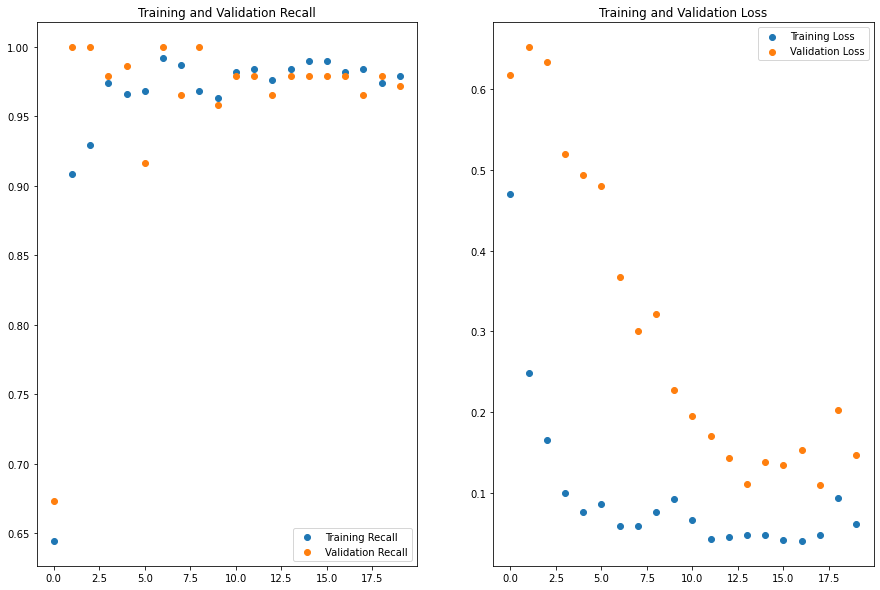

In [19]:
acc = history.history['recall']
val_acc = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.scatter(epochs_range, acc, label='Training Recall')
plt.scatter(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')
plt.subplot(1, 2, 2)
plt.scatter(epochs_range, loss, label='Training Loss')
plt.scatter(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# watch the val_binary_accuracy in the deep learning model and se how it greatly decreased cos the data
# is unfiltered
# also see the kn model and see how the accuracy of the model depriciated